In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('practica2').getOrCreate()
df = spark.read.csv("./insurance.csv", header=True, inferSchema=True)

df.show()

+---+------+------+--------+------+---------+-----------+
|age|   sex|   bmi|children|smoker|   region|    charges|
+---+------+------+--------+------+---------+-----------+
| 19|female|  27.9|       0|   yes|southwest|  16884.924|
| 18|  male| 33.77|       1|    no|southeast|  1725.5523|
| 28|  male|  33.0|       3|    no|southeast|   4449.462|
| 33|  male|22.705|       0|    no|northwest|21984.47061|
| 32|  male| 28.88|       0|    no|northwest|  3866.8552|
| 31|female| 25.74|       0|    no|southeast|  3756.6216|
| 46|female| 33.44|       1|    no|southeast|  8240.5896|
| 37|female| 27.74|       3|    no|northwest|  7281.5056|
| 37|  male| 29.83|       2|    no|northeast|  6406.4107|
| 60|female| 25.84|       0|    no|northwest|28923.13692|
| 25|  male| 26.22|       0|    no|northeast|  2721.3208|
| 62|female| 26.29|       0|   yes|southeast| 27808.7251|
| 23|  male|  34.4|       0|    no|southwest|   1826.843|
| 56|female| 39.82|       0|    no|southeast| 11090.7178|
| 27|  male| 4

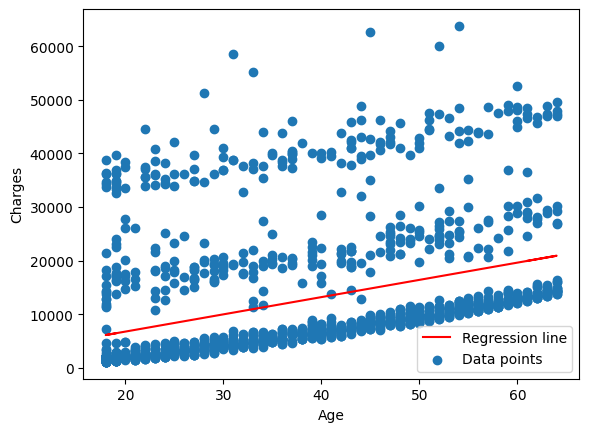

In [9]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array(df.select("age").rdd.map(lambda row: row[0]).collect())
y = np.array(df.select("charges").rdd.map(lambda row: row[0]).collect())

m = 0
b = 0
learning_rate = 0.001
epochs = 1000

def hypothesis(x):
	return m * x + b

n = len(x)
for _ in range(epochs):
	d_m = -(1 / n) * np.sum(x * (y - hypothesis(x)))
	d_b = -(1 / n) * np.sum(y - hypothesis(x))
	m -= learning_rate * d_m
	b -= learning_rate * d_b

plt.scatter(x, y, label='Data points')
plt.plot(x, [hypothesis(xi) for xi in x], color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

In [10]:
new_x = 21
predicted_y = hypothesis(new_x)
print("Predicted Y for age", new_x, ":", predicted_y)

Predicted Y for age 21 : 7097.305579692118


In [11]:
spark.stop()